# Testzone
Script tester zone. Used to try code and ideas.

# Train and test a Scikit-learn Classifier
In this example, the `make_classification` function is used to generate some synthetic data for the example, but in a real-world scenario, you would use your own data. The data is first split into training and test sets using the `train_test_split` function. The `RandomForestClassifier` is initialized with a random state. The classifier is then fit to the training data using the fit method.

In [12]:
# Simple example of how to train a model and test it.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# generate some synthetic data for the example
X, y = make_classification(n_samples=1000, n_features=4, n_classes=2, random_state=0)

# display the first 5 rows of the data
print("Sample of feature vectors X:", X[:5], "and associated labels y:", y[:5], sep="\n")

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# initialize the classifier[:10]
clf = RandomForestClassifier(random_state=0)

# fit the classifier to the training data
clf.fit(X_train, y_train)

Sample of feature vectors X:
[[ 1.27815198 -0.41644753  0.89181112  0.77129444]
 [ 1.35681817 -1.51465569  1.82132242  0.42081175]
 [ 1.53341056  2.06290707 -1.01967188  1.87609016]
 [ 0.42064934  0.05455201  0.13725671  0.32493018]
 [-0.88825673 -1.10088618  0.51393811 -1.05185003]]
and associated labels y:
[1 1 1 1 0]


RandomForestClassifier(random_state=0)

The `predict` method is then used to make predictions on the test data, and the `accuracy_score` function is used to calculate the accuracy of the model. The `classification_report` function is also used to generate a more detailed report of the model's performance, including precision, recall, and F1-score for each class.

In [15]:
from sklearn.metrics import accuracy_score, classification_report

# make predictions on the test data
y_pred = clf.predict(X_test)
print(
    "Sample of predicted labels:", y_pred[:20], 
    "versus actual labels:", y_test[:20], sep="\n"
)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# print the classification report
print(classification_report(y_test, y_pred))

Sample of predicted labels:
[1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0]
versus actual labels:
[1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0]
Accuracy: 97.00%
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        95
           1       0.96      0.98      0.97       105

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



Here, the `confusion_matrix` function is used to calculate a confusion matrix, which is a 2x2 table that shows the number of true positives, false positives, true negatives, and false negatives. The `roc_curve` function is used to calculate the false positive rate and true positive rate, which are used to plot the ROC curve. The `auc` function is used to calculate the area under the ROC curve, which is a measure of the classifier's performance. Finally, the ROC curve is plotted using `matplotlib`.

Confusion Matrix: 
 [[ 91   4]
 [  2 103]]
True Positives:  103
True Negatives:  91
False Positives:  4
False Negatives:  2
AUC: 0.97


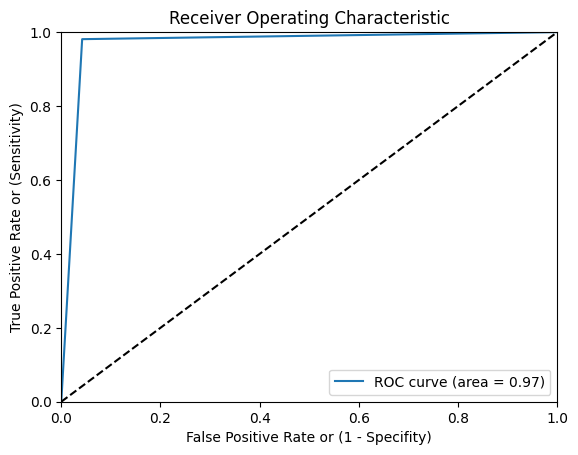

In [17]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", cm)
print("True Positives: ", cm[1, 1])
print("True Negatives: ", cm[0, 0])
print("False Positives: ", cm[0, 1])
print("False Negatives: ", cm[1, 0])

# calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)
print("AUC: {:.2f}".format(roc_auc))

# plot the ROC curve
import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

## Testing codebase


In [1]:
import utils
import os
import time
import pandas as pd
import numpy as np
from datetime import datetime

# machine learning
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

import utils

In [18]:
# program parameters
from dataclasses import dataclass

@dataclass
class ProgramParameters:
    """
    Wrapper class for program parameters.
    """
    MODEL_DIR_PATH = os.environ['HOME'] + "/Documents/code/phdtrack/Smart-and-Naive-SSH-Key-Extraction/smart_ssh_key_extractor/new_models"
    TRAINING_DIR_PATH = os.environ['HOME'] + '/Documents/code/phdtrack/phdtrack_data/Training/Training/basic/V_6_0_P1/32'
    VALIDATION_DIR_PATH = os.environ['HOME'] + '/Documents/code/phdtrack/phdtrack_data/Validation/Validation/basic/V_6_0_P1/16'
    RESULTS_PATH = os.environ['HOME'] + "/Documents/code/phdtrack/Smart-and-Naive-SSH-Key-Extraction/smart_ssh_key_extractor/results"

    def __init__(self, **kwargs):
        if (
            utils.check_path_exists(self.MODEL_DIR_PATH) and
            utils.check_path_exists(self.TRAINING_DIR_PATH) and
            utils.check_path_exists(self.VALIDATION_DIR_PATH)
        ):
            print("Program paths are OK.")
        else:
            print("Program paths are NOT OK.")
            exit(1)


PARAMS = ProgramParameters()

Program paths are OK.


In [20]:
# get the data, create datasets


file_paths, key_paths = utils.get_dataset_file_paths(PARAMS.TRAINING_DIR_PATH)
print("Number of raw files: ", len(file_paths))
print("Number of keys json files: ", len(key_paths))

all_block_datas = utils.create_dataset(PARAMS.TRAINING_DIR_PATH, PARAMS.TRAINING_DIR_PATH)

# transform the data into lists of features and labels
X = []
y = []
for block_data in all_block_datas:
    feature = [block_data.dataset, block_data.offset]
    label = block_data.label

    X.append(feature)
    y.append(label)

print("Number of features: ", len(X))
print("Number of labels: ", len(y))

Number of raw files:  1051
Number of keys json files:  1051


FileNotFoundError: [Errno 2] No such file or directory: '/home/onyr/Documents/code/phdtrack/phdtrack_data/Training/Training/basic/V_6_0_P1/32/30206-164424-key.log'

In [ ]:
# train a new classifier on the data

# Use SMOTE oversampling
start = time.time()
sm = SMOTE()
x_train, y_train = sm.fit_resample(dataset, labels)
end = time.time()
print('Time taken for resampling: %f' % (end - start))

# train a new classifier on the resampled data
start = time.time()
custom_clf = RandomForestClassifier(n_estimators=5)
custom_clf.fit(X=np.array(x_train), y=y_train)
end = time.time()
print('Time taken for training the classifier on resampled data: %f' % (end - start))



In [ ]:
# testing model on the test data
validation_file_paths, validation_key_paths = utils.get_dataset_file_paths(PARAMS.VALIDATION_DIR_PATH)
print("Number of test raw files: ", len(file_paths))
print("Number of test keys json files: ", len(key_paths))

print('Testing Dataset')
start = time.time()
y_test, y_pred, df = utils.test(
    clf=custom_clf, 
    file_paths=validation_file_paths, 
    key_paths=validation_key_paths
)
end = time.time()
print('Time taken for reading and testing: %f' % (end - start))

path = os.path.join(PARAMS.RESULTS_PATH, "test_results_" + str(datetime.now()) + ".csv")
df.to_csv(path)

start = time.time()
print('METRICS OF TEST SET')
utils.print_metrics(y_test=y_test, y_pred=y_pred)
end = time.time()
print('Time taken for computing metrics: %f' % (end - start))